### Introduction
In this mini project,we will predict the salary with a given feature: We are using the “Position_Salaries” dataset on kaggle here is the link of this dataset [Social Network Ads.](https://www.kaggle.com/datasets/akram24/position-salaries)

#### Importing the libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#### Importing the dataset

In [78]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Features and labels

In [95]:
x = df.iloc[:,1:-1].values # select column 2 and 3 for features
y = df.iloc[:,-1].values # for target
y = y.reshape(len(y),1)

### Ploting the features

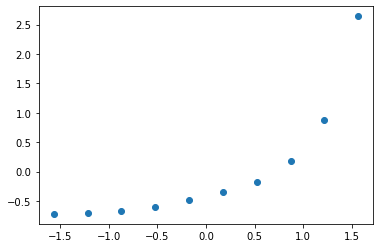

In [143]:
plt.scatter(x,y)
plt.show()

From the plot, it would be better if we use non-linear model to predict the salary. The values in salary are discrete. It will be suitable to use support vector machine regression.

### Feature Scaling
The input feature and target are in different range. For example, the level is 1,2,3 and the salary is 45k, 50k and 60k. Thus, we need to normalize the data.

In [139]:
sc = StandardScaler()
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y  = sc_y.fit_transform(y)

#### Fitting classifier to the Training set

In [123]:
regressor = SVR(kernel='rbf') # rbf is to find linear and non linear relationships.
regressor.fit(x,y)

/Users/zaw/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predicting the Test set results

In [126]:
y_pred = regressor.predict(sc_x.transform([[7]]))
#Rever the feature scale value
sc_y.inverse_transform(y_pred.reshape(-1,1))
# The real salary is

array([[209410.23132923]])

In [134]:
regressor.predict(x)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

#### Visualizing 

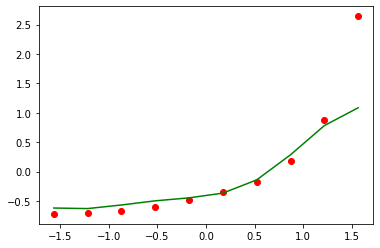

In [140]:
plt.scatter(x,y,color='red')
plt.plot(x,sc_y.inverse_transform((regressor.predict(x).reshape(-1,1))),color='green')

The result seem to be satisifed to some degree. Since the SVR acknowledge the presence of non-linearity in the data and provide a proficient model